In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import ast

In [4]:

style.use('seaborn-poster')
style.use('ggplot')

In [5]:
data = pd.read_csv(r"C:\Users\Ankit Hiremath\Downloads\archive\movies_metadata.csv")
data.head()

c:\users\ankit hiremath\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:

filtered_data = data.filter(['original_title','overview', 'id', 'genres'], axis=1)
len(filtered_data)

45466

In [8]:
genres = filtered_data['genres'].tolist()


In [9]:
genre_per_movie = []
genre_dict = {}
invalid_genres = ['Aniplex', 'BROSTA TV', 'Carousel Productions', 'GoHands',
                  'Mardock Scramble Production Committee', 'Odyssey Media',
                  'Pulser Productions', 'Rogue State', 'Sentai Filmworks',
                  'Telescene Film Group Productions', 'The Cartel', 'Vision View Entertainment', 
                  'TV Movie', 'Foreign']
for genre in genres:
  genre = ast.literal_eval(genre)
  genre_list = []
  for val in genre:
    if val['name'] not in invalid_genres:
      genre_list.append(val['name'])
      if val['name'] in genre_dict:
        genre_dict[val['name']] += 1
      else:
        genre_dict[val['name']] = 1
  genre_per_movie.append(genre_list)

genre_dict = {key:val for key, val in genre_dict.items() if val != 1}
genre_dict

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042}

In [10]:
len(genre_per_movie)


45466

In [11]:
keys = list(genre_dict.keys())
values = list(genre_dict.values())


c:\users\ankit hiremath\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

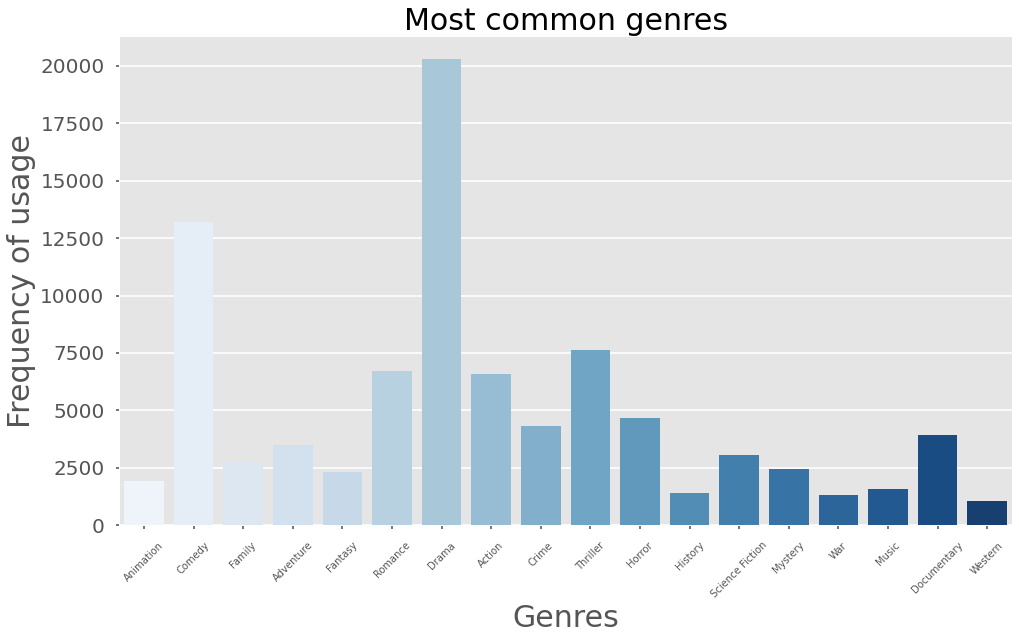

In [12]:
plt.figure(figsize=(16, 9))
sns.barplot(keys, values, palette=("Blues"))
plt.title("Most common genres", size=30)
plt.ylabel('Frequency of usage', size=30)
plt.xlabel('Genres', size=30)
plt.xticks(size=10)
plt.xticks(rotation=45)
plt.yticks(size=20)

In [13]:
filtered_data['genre_list'] = genre_per_movie
filtered_data.head()

,original_title,overview,id,genres,genre_list
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]"
1,Jumanji,When siblings Judy and Peter discover an encha...,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]


In [14]:
filtered_data = filtered_data[filtered_data['genre_list'].map(lambda d: len(d)) > 0]
len(filtered_data)

42995

In [15]:
total_empty = 0
for genre in genre_per_movie:
  if not len(genre):
    total_empty += 1

total_empty

2471

In [18]:
from bs4 import BeautifulSoup
import requests
import os

In [17]:
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=5181322c7f151c16eb4852d7bd8f4199e7e186af1886924064cb24effb8e249e
  Stored in directory: c:\users\ankit hiremath\appdata\local\pip\cache\wheels\0a\9e\ba\20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


You should consider upgrading via the 'c:\users\ankit hiremath\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [22]:
from tmdbv3api import TMDb
from tmdbv3api import Movie
tmdb = TMDb()
tmdb.api_key = 'https://api.themoviedb.org/3/movie/550?api_key=45bf6592c14a965b33549f4cc7e6c664&callback=test'

In [23]:
def get_posters(url, name):
  try:
    baseurl = 'http://image.tmdb.org/t/p/w185'
    link = baseurl + url
    img = requests.get(link).content
    name = name.replace('/', '_')
    file_name = str(name) + ".jpg"
    path = os.path.join('/content/drive/My Drive/Movie_genre_prediction_dataset/downloaded_posters', file_name)
    with open(path, 'wb') as handler:
      handler.write(img)
    return path
  except Exception as e:
    print('[ERROR]', str(e))
    return "Error"

In [21]:
poster_paths = []
movie = Movie()

i = 1
for id, name in zip(filtered_data['id'].tolist(), filtered_data['original_title'].tolist()):
  m = movie.details(int(id))
  print('Downloading:', name, "i", i)
  try:
    poster_paths.append(get_posters(m.poster_path, name))
  except Exception as e:
    print('[ERROR]', str(e))
    poster_paths.append("API Error")
  i += 1
  # temp = name.replace('/', '_')
  # file_name = str(temp) + ".jpg"
  # path = os.path.join('/content/drive/My Drive/Movie_genre_prediction_dataset/downloaded_posters', file_name)
  # if '/' in name:
  #   print(name)
  #   print("Path:", path)

print(len(poster_paths))

TMDbException: Invalid API key: You must be granted a valid key.